In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
symbol = 'ETH-USD'
data = yf.Ticker(symbol)
history = data.history(period='1d',start='2023-01-01')
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-01 00:00:00+00:00,1196.713623,1203.475342,1192.885376,1200.964844,2399674550,0.0,0.0
2023-01-02 00:00:00+00:00,1201.103271,1219.860596,1195.214966,1214.656616,3765758498,0.0,0.0
2023-01-03 00:00:00+00:00,1214.744019,1219.095337,1207.491577,1214.778809,3392972131,0.0,0.0
2023-01-04 00:00:00+00:00,1214.718628,1264.807495,1213.168823,1256.526611,6404416893,0.0,0.0
2023-01-05 00:00:00+00:00,1256.484619,1258.571533,1245.173096,1250.438599,4001786456,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-03 00:00:00+00:00,2355.981445,2385.117676,2113.925293,2210.761963,19332933581,0.0,0.0
2024-01-04 00:00:00+00:00,2210.529053,2294.608154,2204.865723,2269.038086,11044564896,0.0,0.0
2024-01-05 00:00:00+00:00,2269.409424,2276.764648,2209.537109,2268.647217,10860953290,0.0,0.0


## tenkan_sen

In [4]:
d = history
d['Date']=d.index

nine_period_high = d['High'].rolling(window=9).max()
nine_period_low = d['Low'].rolling(window=9).min()
d['tenkan-sen'] = (nine_period_high + nine_period_low) / 2

## kijun_sen

In [5]:
period26_high = d['High'].rolling(window=26).max()
period26_low = d['Low'].rolling(window=26).min()
d['kijun-sen'] = (period26_high + period26_low) / 2

## senkou_span_a

In [6]:
d['senkou-span-a'] = ((d['tenkan-sen'] + d['kijun-sen'])/2).shift(26)

## senkou_span_b

In [8]:
period52_high = d['High'].rolling(window=52).max()
period52_low = d['Low'].rolling(window=52).min()
d['senkou-span-b'] = ((period52_high + period52_low) / 2).shift(26)

## chikou_span

In [9]:
d['chikou-span'] = d['Close'].shift(-26)

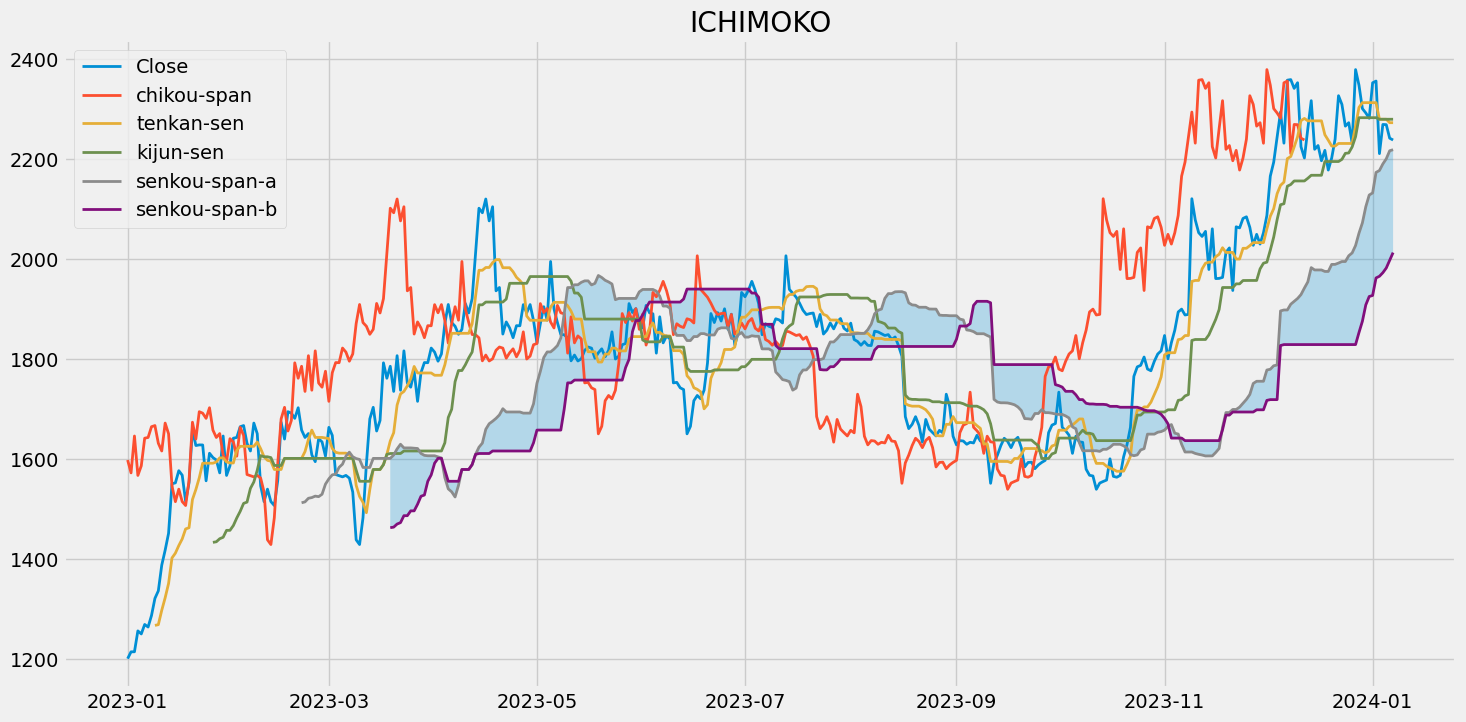

In [11]:
plt.figure(figsize=(16,8))
plt.plot(d['Date'],d['Close'] , label='Close',linewidth = 2)
plt.plot(d['Date'],d['chikou-span'] , label='chikou-span',linewidth = 2)
plt.plot(d['Date'],d['tenkan-sen'] , label='tenkan-sen',linewidth = 2)
plt.plot(d['Date'],d['kijun-sen'] , label='kijun-sen',linewidth = 2)
plt.plot(d['Date'],d['senkou-span-a'] , label='senkou-span-a',linewidth = 2)
plt.plot(d['Date'],d['senkou-span-b'] , label='senkou-span-b',linewidth = 2)
plt.fill_between(d['Date'] , d['senkou-span-a'] , d['senkou-span-b'],alpha=0.25 )
plt.title('ICHIMOKO')
plt.legend()
plt.show()